### Imports 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## Loading Dataset

In [2]:
tv = pd.read_csv('/Users/agni/Desktop/liberty global/viewership_extract.csv',sep='\t',error_bad_lines=False)

In [3]:
print('******************************************************')
print('****  Displaying the first few rows of the  data  ****')
print('******************************************************')
tv.head()

******************************************************
****  Displaying the first few rows of the  data  ****
******************************************************


,household_id,session_start,session_end,channel_name,title,original_broadcast_start,original_broadcast_end,session_type,session_sub_type,genre,sub_genre,playback_speed,episode_title,series_title,gender,dob
0,432215006,2016-04-09 08:36:52,2016-04-09 08:51:52,Nick Junior,Paw Patrol,2016-04-08 10:30:00,2016-04-08 10:45:00,TIMESHIFT,SERIES LINK BOOKING,Kids/Youth,For ages 6-14,1000.0,Pups and the Mischievous Kittens,NaN,Please Specify,1900-01-01
1,432215006,2016-04-27 10:03:48,2016-04-27 10:03:48,Nick Junior,Paw Patrol,2016-04-27 10:00:00,2016-04-27 10:15:00,TIMESHIFT,BUFFER,Kids/Youth,For ages 6-14,1000.0,Pups Save a Sniffle,NaN,Please Specify,1900-01-01
2,432215006,2016-04-27 17:03:48,2016-04-27 17:03:48,Nick Junior,Paw Patrol,2016-04-27 17:00:00,2016-04-27 17:15:00,TIMESHIFT,BUFFER,Kids/Youth,For ages 6-14,1000.0,Pups Save a Sniffle,NaN,Please Specify,1900-01-01
3,432215006,2016-04-18 09:02:46,2016-04-18 09:17:46,Nick Junior,Paw Patrol,2016-04-18 08:45:00,2016-04-18 09:00:00,TIMESHIFT,BUFFER,Kids/Youth,For ages 6-14,1000.0,NaN,NaN,Please Specify,1900-01-01
4,432215006,2016-04-22 17:28:45,2016-04-22 17:28:45,Nick Junior,Paw Patrol,2016-04-22 17:15:00,2016-04-22 17:30:00,TIMESHIFT,BUFFER,Kids/Youth,For ages 6-14,1000.0,NaN,NaN,Please Specify,1900-01-01


In [4]:
print('***********************************************')
print('****  Displaying the Columns of the  data  ****')
print('***********************************************')
tv.columns

***********************************************
****  Displaying the Columns of the  data  ****
***********************************************


Index(['household_id', 'session_start', 'session_end', 'channel_name', 'title',
       'original_broadcast_start', 'original_broadcast_end', 'session_type',
       'session_sub_type', 'genre', 'sub_genre', 'playback_speed',
       'episode_title', 'series_title', 'gender', 'dob'],
      dtype='object')

So we can see from the above that the dataset has 16 columns

### The columns and the above dataset gives us the following information: 


    - What is the household id of the user?
    - When did they start a session ?
    - What tv channel did they watch ?
    - What did they view in the channel ?
    - When did they have their signals broadcasted ?
    - What type of session was the broadcast ? 
    - What type of session sub type was it ?
    - What kind of genre did it fall under ?
    - What kind of sub genre did it fall under ?
    - What was the title of the episode ?
    - What was the title of the series ?
    - What is the gender of the viewer ?
    - What is the dob of the client ?

### Sanity Check

- To check number of rows that are empty
- To find erroneous data 
- To clean the dataset

In [5]:
print('*******************************************************************************')
print('****************************  Answers to the above Questions  ************')
print('*******************************************************************************')
print("\n")
print("How many household ids are there ? {household_id}".format(household_id = len(tv.household_id)))
print("How many household ids are unique ? {household_id}".format(household_id = len(set(tv.household_id))))
print("\n")
print("How many channels are there ? {channel}".format(channel = len(set(tv.channel_name))))
print("\n")
print("Number of unique titles in total ? {title}".format(title = len(set(tv.title))))
print("\n")
print("Types of sessions available? {session_type}".format(session_type = set(tv.session_type)))
print("\n")
print("Types of sub sessions available? {sub_session_type}".format(sub_session_type = set(tv.session_sub_type)))
print("\n")
print("How many genres are there? {genre}".format(genre = len(set(tv.genre))))
print("\n")
print("How many sub-genres are there? {sub_genre}".format(sub_genre = len(set(tv.sub_genre))))
print("\n")
print("How many types of playback speed are there? {speed}".format(speed = len(set(tv.playback_speed))))
print("\n")
print("How many episode titles are there? {episodes}".format(episodes = len(set(tv.episode_title))))
print("\n")
print("How many series title are there? {series_title}".format(series_title = len(set(tv.series_title))))
print("\n")
print("How many gender types are there? {gender}".format(gender = (set(tv.gender))))
print("\n")
print("How many users have unique dob? {dob}".format(dob = len(set(tv.dob))))

*******************************************************************************
****************************  Answers to the above Questions  ************
*******************************************************************************


How many household ids are there ? 3863142
How many household ids are unique ? 2813


How many channels are there ? 238


Number of unique titles in total ? 12627


Types of sessions available? {'LIVE', 'TIMESHIFT', 'REPLAY', 'VOD'}


Types of sub sessions available? {'SVOD', 'REPLAY', 'BUFFER', 'MYPRIME', 'SINGLE RECORDING', 'REPEAT TIME BASED BOOKING', 'SINGLE TIME BASED BOOKING', 'SERIES LINK BOOKING', 'LIVE', 'TVOD'}


How many genres are there? 14


How many sub-genres are there? 72


How many types of playback speed are there? 793


How many episode titles are there? 22628


How many series title are there? 5056


How many gender types are there? {'Male', 'Please Specify', 'Female', 'To be specified'}


How many users have unique dob? 987


### Finding columns without NaN values

In [6]:
tv.isnull().sum().reset_index()

,index,0
0,household_id,0
1,session_start,0
2,session_end,0
3,channel_name,0
4,title,5
5,original_broadcast_start,12181
6,original_broadcast_end,12181
7,session_type,0
8,session_sub_type,0
9,genre,0


In [7]:
## Grouping number of people by dob
print("\nTotal numner of people in the dataset", len(tv.dob))
tv.dob.value_counts().reset_index()[:10]


Total numner of people in the dataset 3863142


,index,dob
0,1900-01-01,2568362
1,1970-01-02,10216
2,1981-02-24,8458
3,1960-01-06,7020
4,1942-11-21,6528
5,1955-08-17,6381
6,1964-10-25,6349
7,1982-04-27,5974
8,1976-05-08,5634
9,1970-11-07,5496


In [8]:
print("Number of rows with proper data for DOB",3863142 - 2568362)
print("Percentage of rows with proper data for DOB",((3863142 - 2568362)/3863142)*100 )
print("Percentage of rows with corrupt data for DOB",((2568362)/3863142)*100 )

Number of rows with proper data for DOB 1294780
Percentage of rows with proper data for DOB 33.516241442846265
Percentage of rows with corrupt data for DOB 66.48375855715373


### Creating a dataframe for the analysis

In [9]:
## Copying the  original dataframe for the cleaning and analysis purpose
df = tv

In [10]:
print("\nDropping the rows with DOB 1990-01-01 because there is no way to get a median/mean for this age for imputation\n")
df = df[df.dob != '1900-01-01']


Dropping the rows with DOB 1990-01-01 because there is no way to get a median/mean for this age for imputation



In [11]:
print("\n Displaying Top 5 Dob by frequency \n")
df.dob.value_counts().reset_index()[:5]


 Displaying Top 5 Dob by frequency 



,index,dob
0,1970-01-02,10216
1,1981-02-24,8458
2,1960-01-06,7020
3,1942-11-21,6528
4,1955-08-17,6381


In [12]:
print("\n Dropping all rows with NaN values to remove unbiases \n")
df = df.dropna()
df.info()


 Dropping all rows with NaN values to remove unbiases 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 308702 entries, 3996 to 3862761
Data columns (total 16 columns):
household_id                308702 non-null int64
session_start               308702 non-null object
session_end                 308702 non-null object
channel_name                308702 non-null object
title                       308702 non-null object
original_broadcast_start    308702 non-null object
original_broadcast_end      308702 non-null object
session_type                308702 non-null object
session_sub_type            308702 non-null object
genre                       308702 non-null object
sub_genre                   308702 non-null object
playback_speed              308702 non-null float64
episode_title               308702 non-null object
series_title                308702 non-null object
gender                      308702 non-null object
dob                         308702 non-null object
dtypes: floa

### Function to calculate age of user

In [13]:
def age(value):
    from datetime import datetime
    
    s2 = '2018-04-03'
    d1=datetime.strptime(value,'%Y-%m-%d')
    d2=datetime.strptime(s2,'%Y-%m-%d')
    ff =(d2-d1)
    return int(ff.days/365.25)

In [14]:
age_group = []
user_age = []
for i in df.dob:    
    if(age(i) <25):
        age_group.append(1)
        user_age.append(age(i))
    if(age(i) >=25 and age(i)<35):
        age_group.append(2)
        user_age.append(age(i))
    if(age(i) >=35 and age(i)<45):
        age_group.append(3)
        user_age.append(age(i))
    if(age(i) >=45 and age(i)<55):
        age_group.append(4)
        user_age.append(age(i))
    if(age(i) >=55 and age(i)<65):
        age_group.append(5)
        user_age.append(age(i))
    if(age(i) >=65):
        age_group.append(6)
        user_age.append(age(i))
        
        
df['age_group'] = age_group
df['user_age'] = user_age

In [15]:
print('*****************************************************')
print('****  Displaying information of the  first 5 rows post modifications  ****')
print('*****************************************************')
df.head(5)

*****************************************************
****  Displaying information of the  first 5 rows post modifications  ****
*****************************************************


,household_id,session_start,session_end,channel_name,title,original_broadcast_start,original_broadcast_end,session_type,session_sub_type,genre,sub_genre,playback_speed,episode_title,series_title,gender,dob,age_group,user_age
3996,432216770,2016-04-04 22:37:32,2016-04-04 22:44:16,E!,LA Clippers Dance Squad,2016-04-04 22:37:32,2016-04-04 23:00:00,LIVE,LIVE,Show/Game Show,Undefined,1000.0,Adventures of the Floss Nest,LA Clippers Dance Squad,Female,1984-08-08,2,33
4005,432216770,2016-04-10 21:01:59,2016-04-10 21:07:23,Sky One,Hawaii Five-0,2016-04-10 21:01:59,2016-04-10 21:07:23,LIVE,LIVE,Drama,Crime,1000.0,Ka Pohaku Kihi Pa'a (The Solid Cornerstone),Hawaii Five-0 - Series 6,Female,1984-08-08,2,33
4006,432216770,2016-04-18 20:07:14,2016-04-18 20:10:09,E!,I Am Cait,2016-04-18 20:07:14,2016-04-18 20:10:09,LIVE,LIVE,Drama,Factual,1000.0,Guess Who's Coming to Dinner?,I Am Cait - Series 2,Female,1984-08-08,2,33
4007,432216770,2016-04-18 20:01:51,2016-04-18 20:02:32,E!,I Am Cait,2016-04-18 20:01:51,2016-04-18 20:02:32,LIVE,LIVE,Drama,Factual,1000.0,Guess Who's Coming to Dinner?,I Am Cait - Series 2,Female,1984-08-08,2,33
4046,432216770,2016-04-18 22:00:00,2016-04-18 22:02:40,E4,Empire,2016-04-18 22:00:00,2016-04-18 22:02:40,LIVE,LIVE,Drama,Undefined,1000.0,A Rose By Any Other Name,Empire - Series 2,Female,1984-08-08,2,33


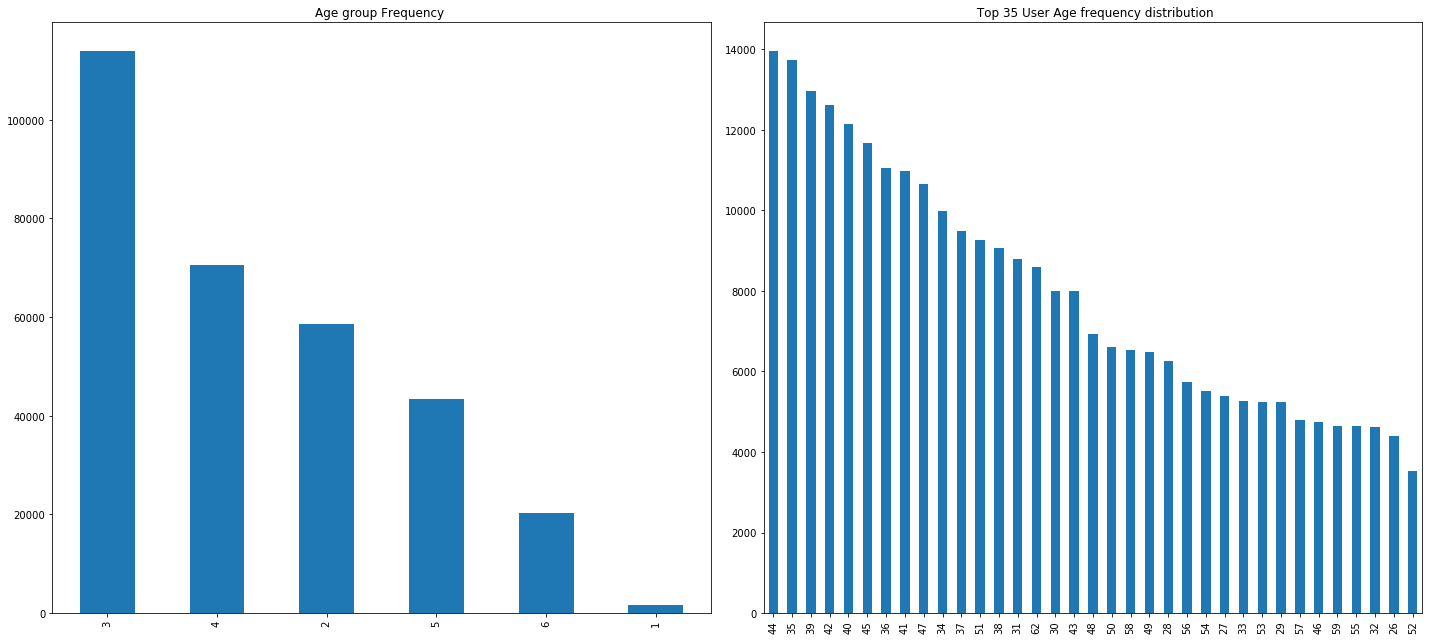

In [16]:
plt.figure(figsize=(20,9))
plt.subplot(1, 2, 1)
plt.title("Age group Frequency ")

df.age_group.value_counts().plot.bar()

plt.subplot(1, 2, 2)
plt.title(" Top 35 User Age frequency distribution")
df.user_age.value_counts()[:35].plot.bar()

plt.tight_layout()

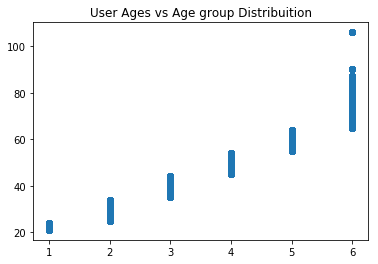

In [17]:
plt.title("User Ages vs Age group Distribuition")
plt.scatter(df.age_group, df.user_age)

In [18]:
## Selecting specific columns for building the models. (Dropping the time rows)

df = df[['household_id','channel_name','title','session_type','session_sub_type','genre','sub_genre','episode_title','series_title','gender','dob','age_group','user_age']]

### Displaying Top 25 Channels and Titles watched by the users

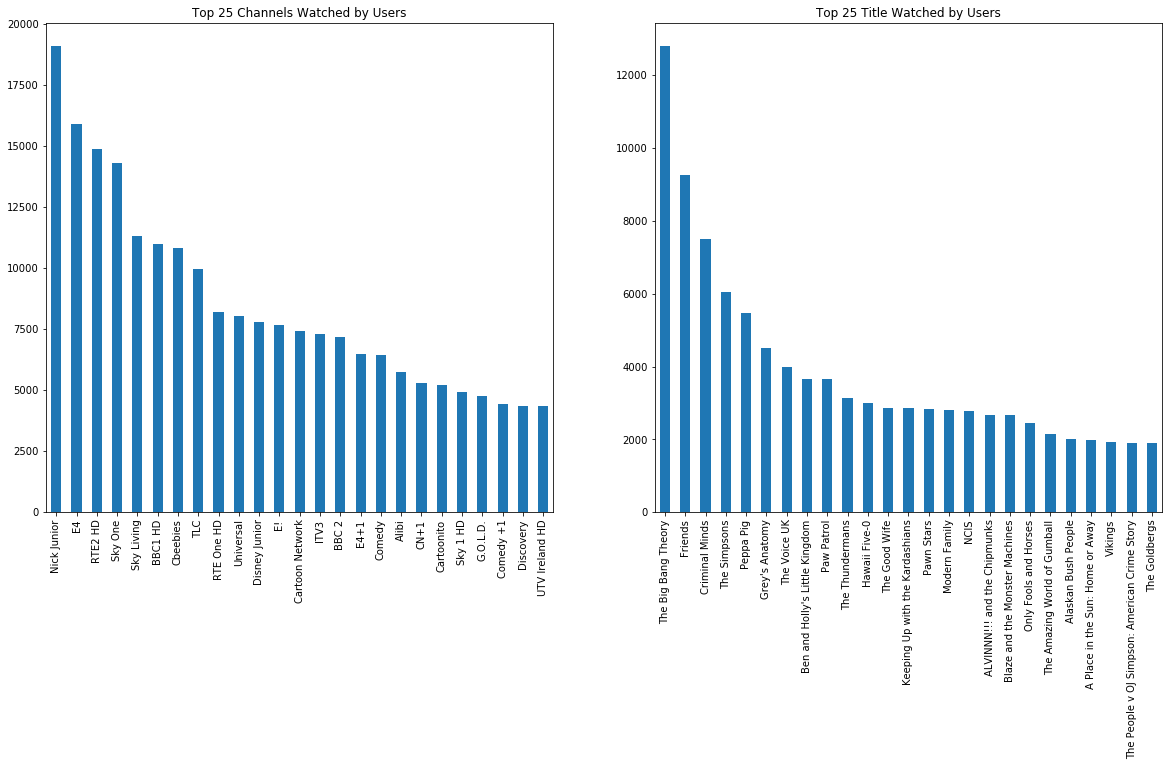

In [19]:
plt.figure(figsize=(20,9))
plt.subplot(1, 2, 1)
df.channel_name.value_counts()[:25].plot.bar()
plt.title("Top 25 Channels Watched by Users")

plt.subplot(1, 2, 2)
df.title.value_counts()[:25].plot.bar()
plt.title("Top 25 Title Watched by Users")

### Grouping by household id by gender and title and showing which title has been played the most

In [20]:
grouped =  df.groupby([df['household_id'],df['gender'], df['title']]) 
grouped_df = pd.DataFrame(grouped.size().reset_index(name = "title_count"))
grouped_df[:5]

,household_id,gender,title,title_count
0,432214538,Female,7 Little Johnstons,1
1,432214538,Female,A Place in the Sun: Home or Away,2
2,432214538,Female,Air Crash Investigation,1
3,432214538,Female,American Pickers,1
4,432214538,Female,CSI: Crime Scene Investigation,2


In [21]:
df.dtypes

household_id         int64
channel_name        object
title               object
session_type        object
session_sub_type    object
genre               object
sub_genre           object
episode_title       object
series_title        object
gender              object
dob                 object
age_group            int64
user_age             int64
dtype: object

### Scikit learn Preprocessing and Data Transformation

The preprocessing and data transformation for our dataset is a bit tricky due to the following reasons:

Our dataset comprises of a lot of categorical columns like, "Title", "Channel_name", "Gender", "Session_type", "Genre", etc. 
Computers are not trained to process strings/ textual data and this information needs to be converted into numbers that can be used by a computer to build a model. 

Essentially, there are 2 methods by which text can be converted to numbers:

- Word Vectorizer
- Label Encoding

Word Vectorizer converts words to word vectors using embeddings, but it is more applicable in a sequence of texts (example, text in a document). Since we don't have text in a sequential format, this method is not advisable for our experiment.

Label Encoding on the other hand makes more sense as it maps and encodes each text to a value. 
For example, if we are converting the titles, "Titanic", "Avatar", "The Godfather" to encoded labels, the computer will assign 1,2,3 for the titles respectively. The problem with this encoding is, the computer will assume that labels for  3 > 2 >1 ("The Godfather" > "Avatar" > "Titanic") which is not the case. To solve this, we have to use OneHotEncoding. There is a drawback of increasing dimensionality while using One Hot Encoding technique, but for the moment we will not consider this, and use a limited number of rows to build and test our model. 

** One hot encoding transforms:
a single variable with n observations and d distinct values, to

d binary variables with n observations each. Each observation indicating the presence (1) or absence (0) of the dth binary variable.

In [22]:
import numpy as np
from numpy import argmax
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [23]:
## For the purpose of our experiment we will be considering 10000 rows
sample = df.sample(n= 10000)

In [24]:
le = LabelEncoder()

In [25]:
sample_features = sample[['household_id', 'channel_name','title','session_sub_type','genre','gender']]
sample_target = sample[['user_age']]

In [26]:
enc_sample_features = sample_features.apply(le.fit_transform)

### Mapping and Storing all the encoded values to their original values

In [27]:
from sklearn import preprocessing

le.fit(sample_features['household_id'])
le_household_id_mapping = dict(zip(le.transform(le.classes_), le.classes_))

le.fit(sample_features['channel_name'])
le_channel_name_mapping = dict(zip(le.transform(le.classes_), le.classes_))

le.fit(sample_features['session_sub_type'])
le_session_sub_type_mapping = dict(zip(le.transform(le.classes_), le.classes_))

le.fit(sample_features['genre'])
le_genre_mapping = dict(zip(le.transform(le.classes_), le.classes_))

le.fit(sample_features['title'])
le_title_mapping = dict(zip(le.transform(le.classes_), le.classes_))

le.fit(sample_features['gender'])
le_gender_mapping = dict(zip(le.transform(le.classes_), le.classes_))

### Applying One Hot Encoder

In [28]:
# binary encode
onehot_encoder = OneHotEncoder(sparse=False)

onehot_encoded_sample_features = onehot_encoder.fit_transform(enc_sample_features)

In [29]:
print("Shape before one hot encoding", enc_sample_features.shape)
print("Shape after one hot encoding ",onehot_encoded_sample_features.shape)

Shape before one hot encoding (10000, 6)
Shape after one hot encoding  (10000, 1934)


In [30]:
from sklearn.model_selection import train_test_split
## Split data into training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(onehot_encoded_sample_features, sample_target['user_age'], random_state=None)

### Building Classifiers

In [31]:
from sklearn import cross_validation, linear_model
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score

/anaconda/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [32]:
import warnings
warnings.filterwarnings('ignore')

In [33]:
lr = linear_model.LogisticRegression()
rf = RandomForestClassifier()
ds = DecisionTreeClassifier()
nb = GaussianNB()
svm = LinearSVC()

### Using Logistic Regression to Predict age

In [34]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [35]:
logistic_regression_prediction = lr.predict(X_test)
logistic_regression_mean_accuracy_score = lr.score(X_test, y_test)

[0.91011290090513453, 0.94532595283202603, 0.9529356927441186, 0.95964134805680035, 0.95866505223410414, 0.96154424983241182, 0.96456077721663414, 0.96436346754548452, 0.9655793554349581]


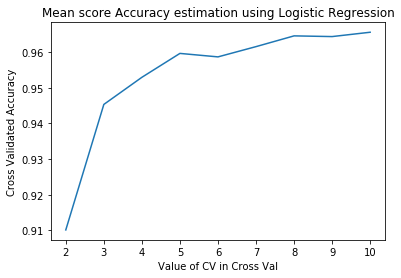

In [36]:
cv_range =  list(range(2, 11))
k_scores = []
for cv in cv_range:
    scores = cross_val_score(lr ,onehot_encoded_sample_features, sample_target, cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)
plt.plot(cv_range, k_scores)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean score Accuracy estimation using Logistic Regression')

### Using Random Forest to predict age

In [37]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [38]:
random_forest_prediction = rf.predict(X_test)
random_forest_mean_accuracy_score = rf.score(X_test, y_test)

[0.84580501750600234, 0.8954852083492586, 0.912309377208121, 0.92400450718945426, 0.92497407476566529, 0.92229151717629654, 0.92984644218263457, 0.92590260217016307, 0.93264777874476601]


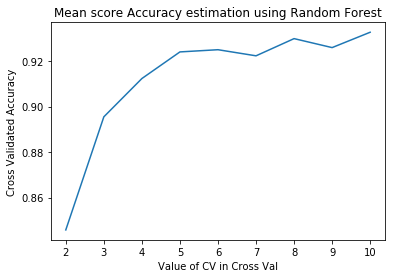

In [39]:
cv_range =  list(range(2, 11))
k_scores = []
for cv in cv_range:
    scores = cross_val_score(rf ,onehot_encoded_sample_features, sample_target , cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)
plt.plot(cv_range, k_scores)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean score Accuracy estimation using Random Forest')

### Using Decision Tree to predict age

In [40]:
ds.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [41]:
decision_tree_prediction = ds.predict(X_test)
decision_tree_mean_accuracy_score = ds.score(X_test, y_test)

In [ ]:
cv_range =  list(range(2, 11))
k_scores = []
for cv in cv_range:
    scores = cross_val_score(ds ,onehot_encoded_sample_features, sample_target, cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)
plt.plot(cv_range, k_scores)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean Accuracy score using Decision Tree')

### Using Naive Bayes to predict age

In [ ]:
nb.fit(X_train, y_train)

In [ ]:
naive_bayes_prediction = nb.predict(X_test)
naive_bayes_mean_accuracy_score = nb.score(X_test, y_test)

In [ ]:
cv_range =  list(range(2, 11))
k_scores = []
for cv in cv_range:
    scores = cross_val_score(nb ,onehot_encoded_sample_features, sample_target , cv=cv, scoring='accuracy')
    k_scores.append(scores.mean())
    
print(k_scores)
plt.plot(cv_range, k_scores)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean Accuracy score using Naive Bayes')

### Using SVM to predict age

In [ ]:
svm.fit(X_train, y_train)

In [ ]:
support_vector_prediction = svm.predict(X_test)
support_vector_mean_accuracy_score = svm.score(X_test, y_test)

In [ ]:
cv_range =  list(range(2, 11))
k_scores = []
for cv in cv_range:
    scores = cross_val_score(svm ,onehot_encoded_sample_features, sample_target, cv=cv)
    k_scores.append(scores.mean())
    
print(k_scores)
plt.plot(cv_range, k_scores)
plt.xlabel('Value of CV in Cross Val')
plt.ylabel('Cross Validated Accuracy')
plt.title('Mean score Accuracy estimation using SVM')

### Iteration II: Trying to predict age from only titles

In [ ]:
sample_features_title = sample[['title']]
enc_sample_features_title = sample_features.apply(le.fit_transform)
onehot_encoded_sample_features_title = onehot_encoder.fit_transform(enc_sample_features_title)

In [ ]:
X_title_train, X_title_test, y_age_train, y_age_test = train_test_split(onehot_encoded_sample_features_title, sample_target['user_age'], random_state=None)

In [ ]:
print("Random Forest mean scores for title vs age prediction",rf.fit(X_title_train, y_age_train).score(X_title_test, y_age_test))

In [ ]:
print("Decision Tree mean scores for title vs age prediction",ds.fit(X_title_train, y_age_train).score(X_title_test, y_age_test))

In [ ]:
print("Naive Bayes mean scores for title vs age prediction",nb.fit(X_title_train, y_age_train).score(X_title_test, y_age_test))

In [ ]:
print("Support Vector mean scores for title vs age prediction",svm.fit(X_title_train, y_age_train).score(X_title_test, y_age_test))

### Building a title recommender based on Item Similarity

In [ ]:
#Class for Item similarity based Recommender System model
import pandas as pd
class item_similarity_recommender_py():
    def __init__(self):
        self.train_data = None
        self.user_id = None
        self.item_id = None
        self.cooccurence_matrix = None
        self.songs_dict = None
        self.rev_songs_dict = None
        self.item_similarity_recommendations = None
        
    #Get unique items (songs) corresponding to a given user
    def get_user_items(self, user):
        user_data = self.train_data[self.train_data[self.user_id] == user]
        user_items = list(user_data[self.item_id].unique())
        
        return user_items
        
    #Get unique users for a given item (song)
    def get_item_users(self, item):
        item_data = self.train_data[self.train_data[self.item_id] == item]
        item_users = set(item_data[self.user_id].unique())
            
        return item_users
        
    #Get unique items (songs) in the training data
    def get_all_items_train_data(self):
        all_items = list(self.train_data[self.item_id].unique())
            
        return all_items
        
    #Construct cooccurence matrix
    def construct_cooccurence_matrix(self, user_songs, all_songs):
            
        ####################################
        #Get users for all songs in user_songs.
        ####################################
        user_songs_users = []        
        for i in range(0, len(user_songs)):
            user_songs_users.append(self.get_item_users(user_songs[i]))
            
        ###############################################
        #Initialize the item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = np.matrix(np.zeros(shape=(len(user_songs), len(all_songs))), float)
           
        #############################################################
        #Calculate similarity between user songs and all unique songs
        #in the training data
        #############################################################
        for i in range(0,len(all_songs)):
            #Calculate unique listeners (users) of song (item) i
            songs_i_data = self.train_data[self.train_data[self.item_id] == all_songs[i]]
            users_i = set(songs_i_data[self.user_id].unique())
            
            for j in range(0,len(user_songs)):       
                    
                #Get unique listeners (users) of song (item) j
                users_j = user_songs_users[j]
                    
                #Calculate intersection of listeners of songs i and j
                users_intersection = users_i.intersection(users_j)
                
                #Calculate cooccurence_matrix[i,j] as Jaccard Index
                if len(users_intersection) != 0:
                    #Calculate union of listeners of songs i and j
                    users_union = users_i.union(users_j)
                    
                    cooccurence_matrix[j,i] = float(len(users_intersection))/float(len(users_union))
                else:
                    cooccurence_matrix[j,i] = 0
                    
        
        return cooccurence_matrix

    
    #Use the cooccurence matrix to make top recommendations
    def generate_top_recommendations(self, user, cooccurence_matrix, all_songs, user_songs):
        print("Non zero values in cooccurence_matrix :%d" % np.count_nonzero(cooccurence_matrix))
        
        #Calculate a weighted average of the scores in cooccurence matrix for all user songs.
        user_sim_scores = cooccurence_matrix.sum(axis=0)/float(cooccurence_matrix.shape[0])
        user_sim_scores = np.array(user_sim_scores)[0].tolist()
 
        #Sort the indices of user_sim_scores based upon their value
        #Also maintain the corresponding score
        sort_index = sorted(((e,i) for i,e in enumerate(list(user_sim_scores))), reverse=True)
    
        #Create a dataframe from the following
        columns = ['household_id', 'title', 'score', 'rank']
        #index = np.arange(1) # array of numbers for the number of samples
        df = pd.DataFrame(columns=columns)
         
        #Fill the dataframe with top 10 item based recommendations
        rank = 1 
        for i in range(0,len(sort_index)):
            if ~np.isnan(sort_index[i][0]) and all_songs[sort_index[i][1]] not in user_songs and rank <= 10:
                df.loc[len(df)]=[user,all_songs[sort_index[i][1]],sort_index[i][0],rank]
                rank = rank+1
        
        #Handle the case where there are no recommendations
        if df.shape[0] == 0:
            print("The current user has no titles for training the item similarity based recommendation model.")
            return -1
        else:
            return df
 
    #Create the item similarity based recommender system model
    def create(self, train_data, user_id, item_id):
        self.train_data = train_data
        self.user_id = user_id
        self.item_id = item_id

    #Use the item similarity based recommender system model to
    #make recommendations
    def recommend(self, user):
        
        ########################################
        #A. Get all unique songs for this user
        ########################################
        user_songs = self.get_user_items(user)    
            
        print("No. of unique titles for the user: %d" % len(user_songs))
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique titles in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
                
        return df_recommendations
    
    #Get similar items to given items
    def get_similar_items(self, item_list):
        
        user_songs = item_list
        
        ######################################################
        #B. Get all unique items (songs) in the training data
        ######################################################
        all_songs = self.get_all_items_train_data()
        
        print("no. of unique titles in the training set: %d" % len(all_songs))
         
        ###############################################
        #C. Construct item cooccurence matrix of size 
        #len(user_songs) X len(songs)
        ###############################################
        cooccurence_matrix = self.construct_cooccurence_matrix(user_songs, all_songs)
        
        #######################################################
        #D. Use the cooccurence matrix to make recommendations
        #######################################################
        user = ""
        df_recommendations = self.generate_top_recommendations(user, cooccurence_matrix, all_songs, user_songs)
         
        return df_recommendations

In [ ]:
is_model = item_similarity_recommender_py()
is_model.create(df, 'household_id', 'title')
users = df['household_id'].unique()
user_id = 432216770	
user_items = is_model.get_user_items(user_id)

print("------------------------------------------------------------------------------------")
print("Training titles for the user userid: %s:" % user_id)
print("------------------------------------------------------------------------------------")

for user_item in user_items:
    print(user_item)

In [ ]:
print("----------------------------------------------------------------------")
print("Top 5 viewed items for household 432216770")
print("----------------------------------------------------------------------")
df[(df.household_id == 432216770) ]['title'].value_counts()[:5]

In [ ]:
print("----------------------------------------------------------------------")
print("Recommendation process going on for household 432216770:")
print("----------------------------------------------------------------------")
is_model.recommend(432216770)

### Conclusion
Based on the the above titles, we can feed this into our model that can predict an user age as shown in the previous cells of this analysis.